In [1]:
import numpy as np

In [ ]:
####################################################
# REGRESSION

In [ ]:
## generating random data to perform a regression on

In [15]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

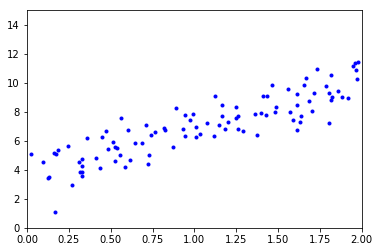

In [155]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 * x + np.random.randn(100,1)
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
## we regress using the normal equation

$\hat{\theta} = (X^{T}X)^{-1} X^{T}y$

In [20]:
X_b = np.c_[np.ones((100,1)),x] ## add one to every instance, to account for the constant term

In [24]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [25]:
theta_best

array([[3.89462205],
       [3.07871125]])

In [ ]:
## which is close to 4 and 3, respectively

In [ ]:
## We make predictions with therese parameters

In [28]:
X_new = np.array([[0],[2]])

In [30]:
X_new_b = np.c_[np.ones((2,1)), X_new]

In [34]:
y_predict = X_new_b.dot(theta_best)

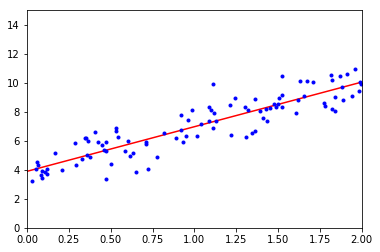

In [40]:
plt.plot(X_new,y_predict,c = 'r')
plt.plot(x,y,'b.')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
## All this can be done like this

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
lin_reg.intercept_, lin_reg.coef_

(array([3.89462205]), array([[3.07871125]]))

In [46]:
lin_reg.predict(X_new)

array([[ 3.89462205],
       [10.05204454]])

In [47]:
# Batch Gradient Descent by Hand

$\theta_{n+1} = \theta_{n} + \eta \nabla_{\theta} \text{MSE}(\theta) $

$\nabla_{\theta} \text{MSE} (\theta) = \frac{2}{m} X^{T}(X\theta - y)$

In [56]:
eta = 0.1
n_iteration = 1000
m = 100
theta = np.random.randn(2,1) ## random initialization

In [57]:
for iteration in range(n_iteration):
    gradient = (2/m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

theta

array([[3.89462205],
       [3.07871125]])

In [70]:
## Now we try Stochastic Gradient Descent

In [68]:
n_epochs = 50
t0, t1 = 5, 50 ## learning schedule parameters

def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

In [69]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2*xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        
theta
        

array([[3.89272276],
       [3.03645951]])

In [71]:
## With scikit learn:

In [72]:
from sklearn.linear_model import SGDRegressor

In [76]:
sgd_reg = SGDRegressor(max_iter = 1000,tol = 1e-3,penalty=None, eta0=0.1)
sgd_reg.fit(x,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [77]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.93661999]), array([3.13086278]))

In [ ]:
# Polynomial Regression

In [ ]:
## We create our polynomial dataset

In [78]:
m=100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

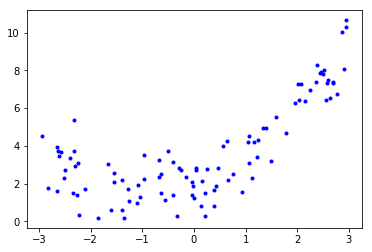

In [82]:
plt.plot(X,y,'b.')
plt.show()

In [84]:
from sklearn.preprocessing import PolynomialFeatures

In [85]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [86]:
X_poly = poly_features.fit_transform(X)

In [88]:
X[0]

array([-2.3130712])

In [90]:
X_poly[0]

array([-2.3130712 ,  5.35029839])

In [ ]:
## Now we have the feature and the square of the feature. We call linear regression on this

In [91]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
c0 =lin_reg.intercept_[0]
c1 = lin_reg.coef_[0,0]
c2 = lin_reg.coef_[0,1]

In [105]:
def predict_y(x):
    return c0 + c1 * x**1 + c2 * x**2

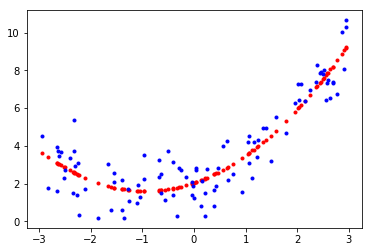

In [113]:
plt.plot(X,predict_y(X),'r.')
plt.plot(X,y,'b.')

plt.show()

In [ ]:
# Learning Curves

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [131]:
def plot_learning_curves(model,X,y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),'r-+',linewidth=2,label='train')
    plt.plot(np.sqrt(val_errors),'b-',linewidth=3,label='val')
    plt.legend()
        

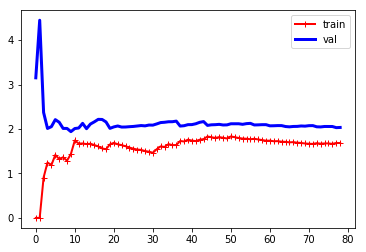

In [133]:
lin_reg  =LinearRegression()
plot_learning_curves(lin_reg,X,y)

In [134]:
## model underfits and reaches a plateu. Both curves reach a similar number

In [ ]:
## We will now model with a 10th degree polynomial

In [135]:
from sklearn.pipeline import Pipeline

In [136]:
polynomial_reg = Pipeline([
    ('poly_features',PolynomialFeatures(degree=10,include_bias=False)),
    ('lin_reg',LinearRegression()),
])

(0, 2)

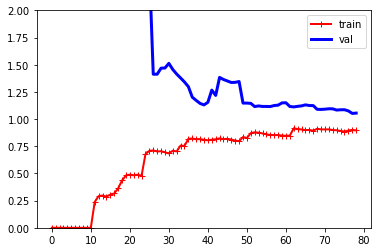

In [146]:
plot_learning_curves(polynomial_reg,X,y)
plt.ylim(0,2)

In [ ]:
## the error on the training data is much slower
## there is a gap between curves, so the model is overfitting
## that ilustrates the bias/variance tradeoff

In [ ]:
# Linear Regularization

In [ ]:
## We use linear data

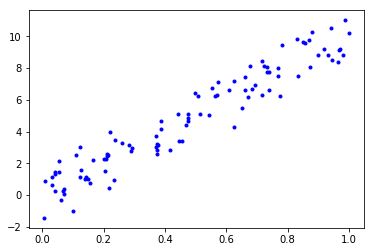

In [173]:
x = np.random.rand(100,1)
y =  10*x + np.random.randn(100,1)
plt.plot(x,y,'b.')
plt.show()

In [147]:
# Ridge Regression (Tikhonov Regulatization)

$J(\theta) = \text{MSE}(\theta)  + \frac{\alpha}{2}\sum_{i = 1}^{n} \theta_{i}^{2} $

In [174]:
from sklearn.linear_model import Ridge

In [175]:
ridge_reg = Ridge(alpha=.1,solver='cholesky')
ridge_reg.fit(X,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [176]:
ridge_reg.predict([[0.5]])

array([[4.84657991]])

In [170]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [177]:
sgd_reg.predict([[0.5]])

array([0.38074158])

In [ ]:
# Lasso Regression

$J(\theta) = \text{MSE}(\theta)  + \frac{\alpha}{2}\sum_{i = 1}^{n} | \theta_{i}| $

In [178]:
from sklearn.linear_model import Lasso

In [179]:
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[0.5]])

array([4.84047071])

In [ ]:
## or with Stochastic Gradient Descent:

In [197]:
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[0.5]])

array([4.831213])

In [ ]:
# Elastic Net

$J(\theta) = \text{MSE}(\theta)  + r\frac{\alpha}{2}\sum_{i = 1}^{n} | \theta_{i}| + (1-r)\frac{\alpha}{2}\sum_{i = 1}^{n} \theta^{2}_{i}$

In [181]:
from sklearn.linear_model import ElasticNet

In [182]:
elastic_net_reg = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic_net_reg.fit(X,y)
elastic_net_reg.predict([[0.5]])

array([4.84047071])

In [183]:
# Early Stopping

In [ ]:
## Implement Early Stopping by hand:

In [185]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

In [186]:
poly_scaler = Pipeline([
    ('poly_features',PolynomialFeatures(degree=90,include_bias=False)),
    ('std_scaler',StandardScaler())
])

In [187]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [188]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [194]:
sgd_reg=SGDRegressor(max_iter=100,tol=np.infty,warm_start=True,penalty=None,
                    learning_rate='constant',eta0=0.0005) ## warm_start = True: the fit method continues 
                                                          ## training where it left off, not restarting.

In [195]:
from sklearn import clone

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled,y_train.ravel()) # continues where it left off
    y_val_predict=sgd_reg.predict(X_val_poly_scaled)
    val_error=mean_squared_error(y_val,y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch=epoch
        best_model=clone(sgd_reg)

In [ ]:
###################################################
# LOGISTIC REGRESSION

In [ ]:
## Log function

$p = \sigma(x^{T}\theta)$

$\sigma(t) = 1/(1+\exp(-t))$

In [ ]:
## Log Loss:

$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}\left[ y^{(i)}\log(p^{(i)})+(1-y^{(i)})\log(1-p^{(i)})\right] $

In [ ]:
## We use the iris dataset
## We'll build a classifier to detect the Iris Virginica type, based on etal width.

In [200]:
from sklearn import datasets

In [202]:
iris = datasets.load_iris()

In [203]:
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [209]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [210]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [221]:
X = iris['data'][:,3:] # petal width
y = (iris['target']==2).astype(np.int) # 1 if virginica, else 0

In [224]:
from sklearn.linear_model import LogisticRegression

In [226]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

/Users/aldodector/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Let's look at predictions for petals widths from 0cm to 3cm

In [229]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

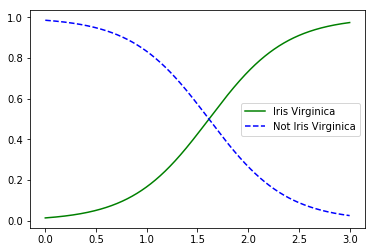

In [233]:
plt.plot(X_new,y_proba[:,1],'g-',label='Iris Virginica')
plt.plot(X_new,y_proba[:,0],'b--',label='Not Iris Virginica')
plt.legend()
plt.show()

In [ ]:
## The Decision Boundary is near 1.6:

In [234]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

In [ ]:
# SoftMax Regression

In [ ]:
## Now we use SoftMax regression to classify iris flowers in the 3 classes.

In [236]:
X = iris['data'][:,(2,3)] # Petal length and width
y = iris['target']

In [237]:
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C = 10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [238]:
softmax_reg.predict([[5,2]]) # class prediction

array([2])

In [239]:
softmax_reg.predict_proba([[5,2]])  # Probability prediction

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])